<h1> Group 20 - DMMML Coursework 2<h1>
    
<hr>

<h3 style="color:blue"> Data <h3> 

Goal : Setup full training data set :

In [331]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#read the attribute csvs file into respective dataframes
X = pd.read_csv ('x_train_gr_smpl.csv')


# read the class attribute file into Y datafram
Y = pd.read_csv('y_train_smpl.csv')
Y.columns = ['Class']

#join the two such that Y is the last column
XYraw = pd.concat([X,Y], axis=1)
#check the concatination
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [332]:

#convert numberic to nominal 
XYraw[['Class']] = XYraw[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

XYraw.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,zero
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,zero
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,zero
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,zero
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,zero


In [333]:

#randomise 
XYraw_ran = XYraw.sample(frac=1).reset_index(drop=True)
print(XYraw_ran)

          0      1      2      3      4      5      6      7      8      9  \
0      32.0   32.0   33.0   34.0   32.0   31.0   30.0   30.0   29.0   27.0   
1      60.0   60.0   62.0   60.0   62.0   64.0   68.0   84.0  132.0  189.0   
2      25.0   26.0   27.0   29.0   30.0   30.0   29.0   28.0   28.0   26.0   
3      31.0   30.0   30.0   30.0   29.0   27.0   25.0   25.0   25.0   25.0   
4     141.0  145.0  146.0  136.0  103.0  120.0  138.0  146.0  140.0  125.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   13.0   15.0   13.0   14.0   15.0   16.0   17.0   15.0   13.0   14.0   
9686   94.0  118.0   85.0   81.0  136.0  173.0  101.0   88.0   84.0   79.0   
9687   59.0   60.0   63.0   70.0   83.0   98.0  103.0  102.0   98.0   93.0   
9688  178.0  167.0  170.0   82.0   75.0  161.0  207.0  207.0  209.0  207.0   
9689  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

In [334]:
#generate this as a csv to directly feed into analyses on independent notebooks
XYraw_ran.to_csv('For_10_Fold_Cross_Validation.csv', index = False)

Split Data into data and expected calsses


In [335]:
#read in data from csv 
training_Data = pd.read_csv("For_10_Fold_Cross_Validation.csv")

#look at shape
training_Data.shape 

#look at data format
training_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,32.0,32.0,33.0,34.0,32.0,31.0,30.0,30.0,29.0,27.0,...,38.0,39.0,46.0,49.0,48.0,43.0,36.0,31.0,28.0,two
1,60.0,60.0,62.0,60.0,62.0,64.0,68.0,84.0,132.0,189.0,...,216.0,217.0,214.0,211.0,203.0,186.0,146.0,120.0,86.0,one
2,25.0,26.0,27.0,29.0,30.0,30.0,29.0,28.0,28.0,26.0,...,28.0,27.0,27.0,27.0,27.0,28.0,29.0,29.0,31.0,two
3,31.0,30.0,30.0,30.0,29.0,27.0,25.0,25.0,25.0,25.0,...,31.0,29.0,27.0,26.0,26.0,27.0,28.0,30.0,31.0,two
4,141.0,145.0,146.0,136.0,103.0,120.0,138.0,146.0,140.0,125.0,...,108.0,110.0,110.0,107.0,103.0,101.0,102.0,103.0,102.0,one


In [336]:
#define the data to be used as all but the class attribute from the data 
X_Train = training_Data.drop('Class', axis = 1)

#define the expexted value to be the class column of the input data 
y_train = training_Data['Class']

Scale data

In [337]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_Train)



<h4> Setup Test Data <h4>

Goal : Import test data from file and set it as  t_test and y_test

In [338]:
testData = pd.read_csv ('Test_Dataset.csv')

X_Test = testData.drop('Class', axis = 1)
y_test = testData['Class']


X_test = sc.fit_transform(X_Test)

<h4> Setup 4000 Split of test data <h4>
    

Goal : Take 4000 instances from the original training file and add them to the test file

In [339]:
#Check length of training data
len(training_Data)

9690

In [340]:
#split data into two divisions
data_split4000, data_split5690= training_Data[:4000], training_Data[4000:]

#test new split 
len(data_split4000)

4000

In [341]:
#merge test and 4000 cases from above 
testData_with4000 =pd.concat([testData, data_split4000])

In [342]:
#size of testData before addition
len(testData)

3090

In [343]:
#check items have been added to testData
len(testData_with4000)

7090

In [344]:
#setup training data
X_Train_4000Split = data_split5690.drop('Class', axis = 1)
y_train_4000Split = data_split5690['Class']


#setup test data
X_Test_4000Split = testData_with4000.drop('Class', axis = 1)
y_test_4000Split = testData_with4000['Class']



sc = StandardScaler()
X_train_4000Split = sc.fit_transform(X_Train_4000Split)
X_test_4000Split = sc.fit_transform(X_Test_4000Split)

<h4> Setup 9000 Split <h4> 

Goal : Take 9000 instances from the original training file and add them to the test file

In [345]:
#Check length of training data
len(training_Data)

9690

In [346]:
#split data into two divisions
data_split9000, data_split690= training_Data[:9000], training_Data[9000:]

#test new split 
len(data_split9000)

9000

In [347]:
#merge test and 4000 cases from above 
testData_with9000 =pd.concat([testData, data_split9000])

In [348]:
#size of testData before addition 
len(testData)

3090

In [349]:
#check items have been added to testData
len(testData_with9000)

12090

In [350]:
#setup training data
X_Train_9000Split = data_split690.drop('Class', axis = 1)
y_train_9000Split = data_split690['Class']


#setup test data
X_Test_9000Split = testData_with4000.drop('Class', axis = 1)
y_test_9000Split = testData_with4000['Class']

#scale data
X_train_9000Split = sc.fit_transform(X_Train_9000Split)
X_test_9000Split = sc.fit_transform(X_Test_9000Split)

Summary : 

X_train - full training data (minus class data) <br>
X_train_4000Split - 4000 removed instances from X_train<br>
X_train_9000Split - 9000 removed instances from X_train <br>

X_test - original test data 
X_test_4000Split - 4000 more instances, taken from X_train<br>
X_test_9000Split - 9000 more instances, taken from X_train<br>

y_train - class attributes for the full training data<br>
y_train_4000Split - 4000 removed instances than y_train<br>
y_train_9000Split - 9000 removed instances than y_train<br>

y_test - class attributes for original testing data <br>
y_test_4000Split - 4000 more instances, taken from y_train <br>
y_test_9000Split - 9000 more instances, taken from y_train <br>

<h2> Decision Trees <h2> 
    <hr>
<h3> J48 <h3>

Decision tree adapted from : 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<hr>
Cross-Validation adapted from : 
https://scikit-learn.org/stable/modules/cross_validation.html 
    
HOWEVER Sklearn uses CART rather than C4.5 which is the algorithm that J48 runs off so this could be incorrect. 

In [351]:
#imports for J48
from sklearn.tree import DecisionTreeClassifier

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

<h4> Cross validation <h4>

Goal : Run cross a decision tree classifier with 10 fold cross validation then output metrics

In [352]:
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#
# Sklearn uses CART rather than C4.5 which is the algorithm that J48 runs off so this could be incorrect. Both 

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores = cross_val_score(classifier, X_train, y_train, cv=10)


Text(0.5, 1.0, 'Average score: 0.8362229102167182')

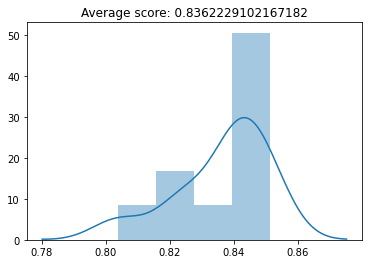

In [353]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores)))

In [354]:
#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred = cross_val_predict(classifier, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48 = confusion_matrix(y_train, y_pred)

#accuracy report
classification_report_J48 = classification_report(y_train, y_pred)

In [355]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48)

print("\n")
print(classification_report_J48)
#print(roc_auc_score(y, y_pred))


Confusion Matrix
[[ 453    9    9    6   14    4   16   10   14    5]
 [   6  161    8    6    7    3    5    7    7    0]
 [   5    3 1753   10   88    6    3   29   76    7]
 [  14    5    3  195   14    2    8   12   15    2]
 [  18    5   95    6 1857    7    9   42  146   35]
 [   6    6    8    5    7  191    2    2   11    2]
 [  11    3    9    8   10    2  283   11   22    1]
 [  19    9   27   11   35    5   16 1205   78    5]
 [   8   12   89   13  144    9   12   86 1861   16]
 [   2    0   12    2   33    0    0    5    5  151]]


              precision    recall  f1-score   support

       eight       0.84      0.84      0.84       540
        five       0.76      0.77      0.76       210
        four       0.87      0.89      0.88      1980
        nine       0.74      0.72      0.73       270
         one       0.84      0.84      0.84      2220
       seven       0.83      0.80      0.81       240
         six       0.80      0.79      0.79       360
       three     

<hr>
<h4>Part 2 - Using test data<h4>

Goal : Run decision classifier on test data provided

In [356]:
#define the model to be used 
classifier_withTestData = DecisionTreeClassifier()

#fit this model using the test data
classifier_withTestData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_testData = classifier_withTestData.predict(X_test)


#confusion matrix generation
conf_matrix_withTestData = confusion_matrix(y_test, y_pred_J48_testData)

#accuracy report
classification_report_withTestData = classification_report(y_test, y_pred_J48_testData)


In [357]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_withTestData)
print("\n")
print(classification_report_withTestData)

Confusion Matrix
[[ 56   2  11   6  17   2  15  18  19   4]
 [  0  27   0   0   0   2   1  30   0   0]
 [  4   3 468   0  49   4  13  61  40  18]
 [  9   1   0  36   9   6   1   0  28   0]
 [ 11   1  49   1 569   3   1   8  67  10]
 [  1  10   1   4  13  18   3   5   2   3]
 [ 13  11   3   8   7   0  32   9   7   0]
 [ 10   3  24   8  42   1   8 305  48   1]
 [  3   3  61   2  73   7   3  47 547   4]
 [  0   0  21   0   6   1   0   3   4  25]]


              precision    recall  f1-score   support

       eight       0.52      0.37      0.44       150
        five       0.44      0.45      0.45        60
        four       0.73      0.71      0.72       660
        nine       0.55      0.40      0.46        90
         one       0.72      0.79      0.76       720
       seven       0.41      0.30      0.35        60
         six       0.42      0.36      0.38        90
       three       0.63      0.68      0.65       450
         two       0.72      0.73      0.72       750
        z

<hr>
<h4>Part 3 - 4000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set.

In [358]:
#define the model to be used 
classifier_4000Split = DecisionTreeClassifier()

#fit this model using the test data
classifier_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_4000Split = classifier_4000Split.predict(X_test_4000Split)

In [359]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(confusion_matrix(y_test_4000Split, y_pred_4000Split))
print("\n")
print(classification_report(y_test_4000Split, y_pred_4000Split))

Confusion Matrix
[[ 239    5    8   18   30   15   23    8   25    3]
 [   2   68   14    2    4   10    2   43    4    1]
 [  13    6 1162    5  105    2   20   59   97   26]
 [  18    9    6   90    4   14    3   11   26    1]
 [   9    2  121   10 1256    1    8   41  152   33]
 [  16    5    3   21    2   94    5    3    5    2]
 [  13    4    5    6   31    7  125   22   17    4]
 [  18    8   15    9   55    5   15  786  132    8]
 [  13   12   53    3  197   12    4   95 1258   11]
 [  11    0   16    3   34    0    2    6   12   73]]


              precision    recall  f1-score   support

       eight       0.68      0.64      0.66       374
        five       0.57      0.45      0.51       150
        four       0.83      0.78      0.80      1495
        nine       0.54      0.49      0.52       182
         one       0.73      0.77      0.75      1633
       seven       0.59      0.60      0.59       156
         six       0.60      0.53      0.57       234
       three     

<hr>
<h4>Part 4 - 9000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set

In [360]:
#define the model to be used 
classifier_9000Split = DecisionTreeClassifier()

#fit this model using the test data
classifier_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_9000Split = classifier_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_9000Split = confusion_matrix(y_test_9000Split, y_pred_9000Split)

#generate classification report
classification_report_9000Split = classification_report(y_test_9000Split, y_pred_9000Split)

In [361]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_9000Split)
print("\n")
print(classification_report_9000Split)

Confusion Matrix
[[ 156    4   18   38   31   15   17   29   57    9]
 [   8   16   29   20    3   26    4   35    9    0]
 [  35    6 1035    6  162   21   31   65  129    5]
 [  47    5   15   73    6    3    9   10   13    1]
 [  21   10  198    7 1045   15   21   61  245   10]
 [  23   13   30   14   18   35    5   12    6    0]
 [  50    4   10   26   16    4   71   20   33    0]
 [  35    0   51    7  156   12   26  553  183   28]
 [  29    1  141   38  426   10   27   99  885    2]
 [  26    5   20    0   46    0    2   21   21   16]]


              precision    recall  f1-score   support

       eight       0.36      0.42      0.39       374
        five       0.25      0.11      0.15       150
        four       0.67      0.69      0.68      1495
        nine       0.32      0.40      0.36       182
         one       0.55      0.64      0.59      1633
       seven       0.25      0.22      0.24       156
         six       0.33      0.30      0.32       234
       three     

<hr>
<h3> Alternative Tree - Random Forest <h3> 
    
  

adapted from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [362]:
#imports for Random Forest
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier

<hr>
<h4> Cross Validation <h4>

Goal : Run cross a random forest classifier with 10 fold cross validation then output metrics

In [363]:
#create a Gaussian Classifier - random forest
randomForest_crossVal = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest_crossVal.fit(X_train, y_train)


#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_randomForest = cross_val_score(randomForest_crossVal, X_train, y_train, cv=10)


Text(0.5, 1.0, 'Average score: 0.9782249742002064')

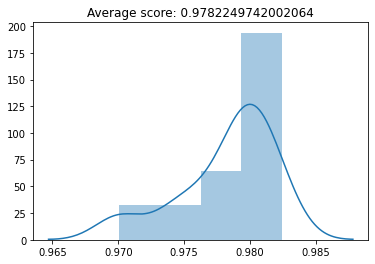

In [364]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores_randomForest)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores_randomForest)))

In [365]:
#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_randomForest_crosVal = cross_val_predict(randomForest, X_train, y_train, cv=10)

#allows for confusion matrix generation
conf_matrix_randomForest = confusion_matrix(y_train, y_pred_randomForest_crossVal)
classification_report_randomForest = classification_report(y_train, y_pred_RandomForest_crossVal)

NameError: name 'y_pred_randomForest_crossVal' is not defined

In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_randomForest)

print("\n")
print(classification_report_randomForest)
#print(roc_auc_score(y, y_pred))

<hr>
<h4> with Test data <h4> 

Goal : Run a random forest classifier with test data

In [ ]:
#create a Gaussian Classifier - random forest

randomForest_withTestData = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest_withTestData.fit(X_train, y_train)


#test this model on the seperated data
y_pred_randomForest_testData = randomForest_withTestData.predict(X_test)


#confusion matrix generation
conf_matrix_randomForest_withTestData = confusion_matrix(y_test, y_pred_randomForest_testData)

#accuracy report
classification_report_randomForest_withTestData = classification_report(y_test, y_pred_randomForest_testData)

In [ ]:
print("Confusion Matrix")
print(conf_matrix_randomForest_withTestData)
print("\n")
print(classification_report_randomForest_withTestData)

<hr>
<h4> Data Split - 4000<h4> 

Goal : Run a random forest classifier with 4000 instances moves from the original training data into the test data. 

In [ ]:
#create a Gaussian Classifier - random forest

randomForest_4000Split = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest_4000Split.fit(X_train_4000Split, y_train_4000Split)


#test this model on the seperated data
y_pred_randomForest_4000Split = randomForest_4000Split.predict(X_test_4000Split)


#confusion matrix generation
conf_matrix_randomForest_4000Split = confusion_matrix(y_test_4000Split, y_pred_randomForest_4000Split)

#accuracy report
classification_report_randomForest_4000Split = classification_report(y_test_4000Split, y_pred_randomForest_4000Split)

In [ ]:
print("Confusion Matrix")
print(conf_matrix_randomForest_4000Split)
print("\n")
print(classification_report_randomForest_4000Split)

<hr>
<h4> Data Split - 9000<h4> 

Goal : Run a random forest classifier with 9000 instances moves from the original training data into the test data. 

In [ ]:
#create a Gaussian Classifier - random forest

randomForest_9000Split = RandomForestClassifier(n_estimators = 100)

#train the model using the training set generated 
randomForest_9000Split.fit(X_train_9000Split, y_train_9000Split)


#test this model on the seperated data
y_pred_randomForest_9000Split = randomForest_9000Split.predict(X_test_9000Split)


#confusion matrix generation
conf_matrix_randomForest_9000Split = confusion_matrix(y_test_9000Split, y_pred_randomForest_9000Split)

#accuracy report
classification_report_randomForest_9000Split = classification_report(y_test_9000Split, y_pred_randomForest_9000Split)

In [ ]:
print("Confusion Matrix")
print(conf_matrix_randomForest_9000Split)
print("\n")
print(classification_report_randomForest_9000Split)

<h2> Neural Networks <h2>
   <hr>

<h3> Linear Classifier - Support Vector Classification <h3>

Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Benefits - High accuracy compard to other decision tree methods thanks to a kernel trick, which allows it to handle non linear input spaces.

SVC - The classifier separates data points using a hyperplane with the largest amount of margin.

Further info here :
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [ ]:
# Setup SVC

from sklearn.svm import SVC

In [ ]:
#Create a svm Classifier
svmClassifier_withTestData = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmClassifier_withTestData.fit(X_train, y_train)


#test this model on the seperated data
y_pred_svmClassifier_withTestData = svmClassifier_withTestData.predict(X_test)


#confusion matrix generation
conf_matrix_svmClassifier_withTestData = confusion_matrix(y_test, y_pred_svmClassifier_withTestData)

#accuracy report
classification_report_randomForest_withTestData = classification_report(y_test, y_pred_svmClassifier_withTestData)

In [ ]:
print("Confusion Matrix")
print(conf_matrix_svmClassifier_withTestData)
print("\n")
print(classification_report_randomForest_withTestData)

<h3> MLP <h3>

<h3> Results and Other <h3>

would be cool to produce some plots like this for comparing models : 


https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html